In [1]:
import sys

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
all_df = pd.read_csv('./TraData.csv', low_memory=False)

In [4]:
print(all_df.columns.values)

['adx' 'spaceType' 'spaceId' 'spaceCat' 'adType' 'ip' 'os' 'deviceType'
 'publisherId' 'dclkVerticals' 'campaignId' 'advertiserId' 'click']


In [5]:
# preview the data
all_df.head()

,adx,spaceType,spaceId,spaceCat,adType,ip,os,deviceType,publisherId,dclkVerticals,campaignId,advertiserId,click
0,oN9K9JVNmtH69Q1KBbhHUtZ34mw/vdefue3wgNg/kWU=,site,4d5aa536cd864b8d,IAB12,"[3,9]",7Rud97q13Yk7EGzprFZy33wjYC3lKOkoc1jboz3ToXQ=,Android,Phone,5ad6008850,NaN,4612,266,0
1,oN9K9JVNmtH69Q1KBbhHUtZ34mw/vdefue3wgNg/kWU=,site,df29ee4288fb474d,IAB14_1,"[3,9]",HrAoePTXzwTq5HChEWEPrcUeiXOotVgU0eYw3LrI7Pk=,Android,Phone,ca10720d22,NaN,4619,215,0
2,oN9K9JVNmtH69Q1KBbhHUtZ34mw/vdefue3wgNg/kWU=,site,fabac3bca4a34996,IAB12,"[3,9]",MLTk/b+dXbPnYVL1Y6rA0Q8yL23r4CYoGLTuB9L00v0=,Android,Phone,adcfa8aac4,NaN,4597,215,0
3,oN9K9JVNmtH69Q1KBbhHUtZ34mw/vdefue3wgNg/kWU=,site,946bc0ae7ddf40a3,IAB12,"[3,9]",s/8/MB6H7Z7v6OqfbEEIbf7umyGRoT8cQGsCEapBOb0=,Windows,Computer,de184afdf3,NaN,4608,173,0
4,oN9K9JVNmtH69Q1KBbhHUtZ34mw/vdefue3wgNg/kWU=,site,4d5aa536cd864b8d,IAB12,"[3,9]",vIEzEmgA7srRUPf3VWgcNEYEwasLE8wwU/EcDNNnn44=,Android,Phone,5ad6008850,NaN,4612,266,0


In [6]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961457 entries, 0 to 961456
Data columns (total 13 columns):
adx              961457 non-null object
spaceType        961457 non-null object
spaceId          961457 non-null object
spaceCat         961286 non-null object
adType           961457 non-null object
ip               961457 non-null object
os               961457 non-null object
deviceType       961457 non-null object
publisherId      961457 non-null object
dclkVerticals    1218 non-null object
campaignId       961457 non-null int64
advertiserId     961457 non-null int64
click            961457 non-null int64
dtypes: int64(3), object(10)
memory usage: 95.4+ MB


In [7]:
all_df.describe()

,campaignId,advertiserId,click
count,961457.000000,961457.000000,961457.000000
mean,4609.638719,195.320444,0.000617
std,25.889714,68.249918,0.024827
min,4506.000000,16.000000,0.000000
25%,4603.000000,127.000000,0.000000
50%,4612.000000,215.000000,0.000000
75%,4627.000000,266.000000,0.000000
max,4636.000000,273.000000,1.000000


In [8]:
all_df.describe(include=['O'])

,adx,spaceType,spaceId,spaceCat,adType,ip,os,deviceType,publisherId,dclkVerticals
count,961457,961457,961457,961286,961457,961457,961457,961457,961457,1218
unique,2,2,309,22,6,714922,14,3,62,651
top,oN9K9JVNmtH69Q1KBbhHUtZ34mw/vdefue3wgNg/kWU=,site,4d5aa536cd864b8d,IAB12,"[3,9]",47DEQpj8HBSa+/TImW+5JCeuQeRkm5NMpJWZG3hSuFU=,Android,Phone,5ad6008850,[]
freq,960239,958317,207461,709981,958295,4266,415074,729615,574610,162


In [9]:
for x in all_df.columns.values:
    print(all_df[x].value_counts())
    print("\n")


oN9K9JVNmtH69Q1KBbhHUtZ34mw/vdefue3wgNg/kWU=    960239
CuXcT8n6P0sIIAJUDjlunuV0ZnzP7p3Xf1jHLo2OlOE=      1218
Name: adx, dtype: int64


site    958317
app       3140
Name: spaceType, dtype: int64


4d5aa536cd864b8d            207461
c60bd9fe77034acf            100203
df29ee4288fb474d             68067
fa604d518ae1467e             67354
b5c7401fdb844f88             51410
cb4ebda0667a420c             47348
d0850c0f52434b05             40352
1a2687687697428b             39181
fabac3bca4a34996             28905
31e5a397d5b446d6             16626
44846a9be8b9491e             12054
5bf9d630c1d145ad             11984
fdf13d0e67b2490f             11645
c60975775c6f4777             11341
1594dbbf247b46a1             10994
f70c5595c6384911             10189
39bae4031f5749e5              9947
81565d0bbb714164              9332
468208fd4f584df9              8315
885942723ca24daa              7663
9ea6db12e4af4782              6426
946bc0ae7ddf40a3              5920
f84a62779b074594              54

In [10]:
adx = all_df.loc[:,('adx', 'click')]
adx['count'] = 1
aggregator = {'click': 'mean', 'count': 'sum'}
adx.groupby(['adx'], as_index=False).agg(aggregator).sort_values(by='click', ascending=False)

,adx,click,count
0,CuXcT8n6P0sIIAJUDjlunuV0ZnzP7p3Xf1jHLo2OlOE=,0.000821,1218
1,oN9K9JVNmtH69Q1KBbhHUtZ34mw/vdefue3wgNg/kWU=,0.000617,960239


In [11]:
spt = all_df.loc[:,('spaceType', 'click')]
spt['count'] = 1
aggregator = {'click': 'mean', 'count': 'sum'}
spt.groupby(['spaceType'], as_index=False).agg(aggregator).sort_values(by='click', ascending=False)

,spaceType,click,count
1,site,0.000619,958317
0,app,0.000000,3140


In [12]:
spd = all_df.loc[:,('spaceId', 'click')]
spd['count'] = 1
aggregator = {'click': 'mean', 'count': 'sum'}
spd.groupby(['spaceId'], as_index=False).agg(aggregator).sort_values(by='click', ascending=False).head(10)

,spaceId,click,count
105,7f068f54a11e4d56,0.120120,666
54,44b9221f3c5742d3,0.056604,742
229,fbadbe0b84574e6c,0.047619,21
119,8e2e462a46df4439,0.039122,1048
129,a0faeba51aec4944,0.037007,1216
110,835efb3468c24b8d,0.036364,330
205,e53805fd0b0f45d7,0.026087,230
191,d9055bc9592444e0,0.013475,2449
1,00b07139e7c2469f,0.012500,80
85,655005bab3a9414d,0.011494,87


In [13]:
sct = all_df.loc[:,('spaceCat', 'click')]
sct['count'] = 1
aggregator = {'click': 'mean', 'count': 'sum'}
sct.groupby(['spaceCat'], as_index=False).agg(aggregator).sort_values(by='click', ascending=False).head(10)

,spaceCat,click,count
11,IAB19_18,0.032698,367
13,IAB2,0.008547,117
4,IAB13,0.006098,164
0,IAB1,0.005423,17701
5,IAB14_1,0.001646,104502
19,IAB8,0.001630,11046
15,IAB22,0.001445,692
20,IAB9,0.001295,772
9,IAB18,0.001221,5732
8,IAB17,0.000616,17858


In [14]:
adt = all_df.loc[:,('adType', 'click')]
adt['count'] = 1
aggregator = {'click': 'mean', 'count': 'sum'}
adt.groupby(['adType'], as_index=False).agg(aggregator).sort_values(by='click', ascending=False).head(10)

,adType,click,count
5,[4],0.046369,1790
3,"[1,2,5,7]",0.001299,770
4,"[3,9]",0.000531,958295
0,"[1,2,5,6,7,8]",0.000000,49
1,"[1,2,5,6,7]",0.000000,448
2,"[1,2,5,7,8]",0.000000,105


In [15]:
ip = all_df.loc[:,('ip', 'click')]
ip['count'] = 1
aggregator = {'click': 'mean', 'count': 'sum'}
ip.groupby(['ip'], as_index=False).agg(aggregator).sort_values(by='click', ascending=False).head(10)

,ip,click,count
329527,RQEikp3eipwmVfhBjwR/y8m01J0p+fF9emMe5RTfpHk=,1.0,1
185973,EbO84/dGxPzxlsuF3+hPNgD8fnedwD8Ec+xBgV9YpAg=,1.0,1
407741,YTKRw6rz7VigqF+GQwUOBljyNE7ceNJYS6PSp9a0KRg=,1.0,1
31205,0mCHfOi7qOiprjoJAUJ+KC+7tXKOp2FwHlAhhqCDLZE=,1.0,1
442421,bXhKxDjPEabRXQUAUsONNJ1jXPXfxWkYDnukForHGxU=,1.0,1
10156,+uAuX0tIXxhHu1d/7LFR8+oQU3PZ/xwJc64SY2lgJJ4=,1.0,1
575581,nVD+fv9iOmVE6sXQtaNdVa9OfU/gEKobWU8cTsof1VE=,1.0,1
519762,iVgZutnakWInIdVj2fpLSo0F6Us335nB6Q5QIT4NtUU=,1.0,1
249711,KJ09JCOTaHI2xraFt7dUxtubGi6i6xXwNskLU1RNJ5M=,1.0,1
525222,j+cXPiok35Qt2mjsY12CJ84UOWQu1emkch2nkPClvz0=,1.0,1


In [16]:
os = all_df.loc[:,('os', 'click')]
os['count'] = 1
aggregator = {'click': 'mean', 'count': 'sum'}
os.groupby(['os'], as_index=False).agg(aggregator).sort_values(by='click', ascending=False).head(10)

,os,click,count
6,Windows Phone,0.005780,173
7,android,0.001572,636
2,Linux,0.001083,1846
0,Android,0.000889,415074
4,Unknown,0.000697,4302
3,OS X,0.000683,13174
5,Windows,0.000618,176464
8,iOS,0.000284,349206
1,BlackBerry,0.000000,3
9,ipad,0.000000,31


In [17]:
dvt = all_df.loc[:,('deviceType', 'click')]
dvt['count'] = 1
aggregator = {'click': 'mean', 'count': 'sum'}
dvt.groupby(['deviceType'], as_index=False).agg(aggregator).sort_values(by='click', ascending=False).head(10)

,deviceType,click,count
2,Tablet,0.000740,37825
0,Computer,0.000634,194017
1,Phone,0.000606,729615


In [18]:
pid = all_df.loc[:,('publisherId', 'click')]
pid['count'] = 1
aggregator = {'click': 'mean', 'count': 'sum'}
pid.groupby(['publisherId'], as_index=False).agg(aggregator).sort_values(by='click', ascending=False).head(10)

,publisherId,click,count
49,b92d94c79d,0.060044,1349
7,17ff555b8c,0.046369,1790
17,4113dd3c7b,0.036364,330
6,1669db331b,0.011176,4116
10,223727100b,0.008281,4106
21,483683f751,0.006410,156
50,ba76c28c2c,0.002397,2920
3,0e3a1a8bd8,0.001747,4006
33,721f3799d6,0.001701,4115
35,755dffed4e,0.001621,617


In [19]:
dcv = all_df.loc[:,('dclkVerticals', 'click')]
dcv['count'] = 1
aggregator = {'click': 'mean', 'count': 'sum'}
dcv.groupby(['dclkVerticals'], as_index=False).agg(aggregator).sort_values(by='click', ascending=False).head(10)

,dclkVerticals,click,count
521,"[{""""""""""""""""""""""""""""""""id"""""""""""""""""""""""""""""""":58,""""""""""""...",1,1
0,[],0,162
438,"[{""""""""""""""""""""""""""""""""id"""""""""""""""""""""""""""""""":422,""""""""""...",0,1
431,"[{""""""""""""""""""""""""""""""""id"""""""""""""""""""""""""""""""":420,""""""""""...",0,1
432,"[{""""""""""""""""""""""""""""""""id"""""""""""""""""""""""""""""""":420,""""""""""...",0,1
433,"[{""""""""""""""""""""""""""""""""id"""""""""""""""""""""""""""""""":420,""""""""""...",0,1
434,"[{""""""""""""""""""""""""""""""""id"""""""""""""""""""""""""""""""":420,""""""""""...",0,1
435,"[{""""""""""""""""""""""""""""""""id"""""""""""""""""""""""""""""""":420,""""""""""...",0,1
436,"[{""""""""""""""""""""""""""""""""id"""""""""""""""""""""""""""""""":420,""""""""""...",0,1
437,"[{""""""""""""""""""""""""""""""""id"""""""""""""""""""""""""""""""":420,""""""""""...",0,1


In [20]:
cid = all_df.loc[:,('campaignId', 'click')]
cid['count'] = 1
aggregator = {'click': 'mean', 'count': 'sum'}
cid.groupby(['campaignId'], as_index=False).agg(aggregator).sort_values(by='click', ascending=False).head(10)

,campaignId,click,count
35,4621,0.176471,17
24,4604,0.067961,309
45,4633,0.056604,742
29,4611,0.053333,600
27,4609,0.045899,1329
46,4634,0.039122,1048
9,4577,0.014706,68
16,4591,0.003161,6011
3,4540,0.002822,1063
47,4635,0.001876,25052


In [21]:
aid = all_df.loc[:,('advertiserId', 'click')]
aid['count'] = 1
aggregator = {'click': 'mean', 'count': 'sum'}
aid.groupby(['advertiserId'], as_index=False).agg(aggregator).sort_values(by='click', ascending=False).head(10)

,advertiserId,click,count
18,269,0.046369,1790
11,250,0.003161,6011
16,267,0.002822,1063
8,237,0.001670,12575
5,127,0.001602,19977
9,240,0.001356,3687
21,273,0.000897,14499
6,173,0.000817,179985
20,272,0.000780,15388
17,268,0.000703,11382


In [22]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 18 , 15 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [23]:
# https://stackoverflow.com/questions/39390160/pandas-factorize-on-an-entire-data-frame
df_trans = all_df.loc[:]
df_trans = df_trans.apply(lambda x: pd.factorize(x)[0])
df_trans.head(10)

,adx,spaceType,spaceId,spaceCat,adType,ip,os,deviceType,publisherId,dclkVerticals,campaignId,advertiserId,click
0,0,0,0,0,0,0,0,0,0,-1,0,0,0
1,0,0,1,1,0,1,0,0,1,-1,1,1,0
2,0,0,2,0,0,2,0,0,2,-1,2,1,0
3,0,0,3,0,0,3,1,1,3,-1,3,2,0
4,0,0,0,0,0,4,0,0,0,-1,0,0,0
5,0,0,0,0,0,5,2,0,0,-1,0,0,0
6,0,0,4,0,0,6,1,1,0,-1,4,2,0
7,0,0,5,2,0,7,0,0,4,-1,0,0,0
8,0,0,2,0,0,8,1,1,2,-1,5,1,0
9,0,0,0,0,0,9,2,0,0,-1,0,0,0


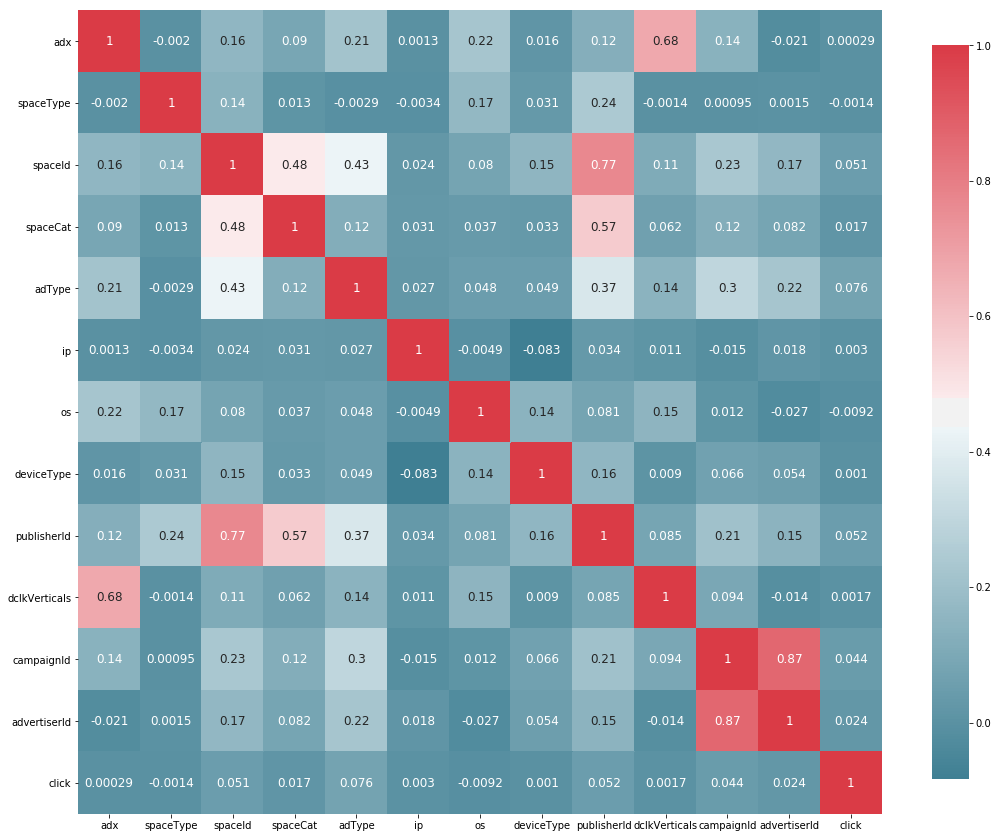

In [24]:
# https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial
plot_correlation_map(df_trans)

In [25]:
# Correlations to "click" are all very low.
# We should kick out some trash categories which has almost nothing to do with "click".
# Note the special case with "dclkVerticals", which has lots NaN entry. There are 2 ways to cope with it. Remove it or make the values 0 for NaN, otherwise 1.
# Categories that are probably no use( abs() < 0.01 ): deviceType, spaceType, dclkVerticals, adx, ip, os(?)

df_final = df_trans.drop(['deviceType', 'spaceType', 'dclkVerticals', 'adx', 'ip', 'os'], axis = 1)
df_final.head(10)

,spaceId,spaceCat,adType,publisherId,campaignId,advertiserId,click
0,0,0,0,0,0,0,0
1,1,1,0,1,1,1,0
2,2,0,0,2,2,1,0
3,3,0,0,3,3,2,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,4,0,0,0,4,2,0
7,5,2,0,4,0,0,0
8,2,0,0,2,5,1,0
9,0,0,0,0,0,0,0


In [26]:
 print(df_final['click'].value_counts())
    

0    960864
1       593
Name: click, dtype: int64


In [27]:
pos = df_final[df_final['click'] == 1].sample(frac=1)
pos = np.split(pos, [df_final['click'].value_counts()[1] // 10 * 2], axis = 0)
train = pos[1]
train = train.append([pos[1]] * 99, ignore_index=True)
test = pos[0]
neg = df_final[df_final['click'] == 0].sample(frac=1)
neg = np.split(neg, [df_final['click'].value_counts()[0] // 10 * 2], axis = 0)
train = train.append(neg[1], ignore_index=True).sample(frac=1)
test = test.append(neg[0], ignore_index=True).sample(frac=1)
X_train = train.drop(['click'], axis = 1)
Y_train = train['click']
X_test = test.drop(['click'], axis = 1)
Y_test = test['click']
sc = StandardScaler()
sc.fit(X_train)
X_trstd = sc.transform(X_train)
X_tsstd = sc.transform(X_test)

In [28]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
clf.fit(X_trstd, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
display(X_trstd)

array([[ 0.3281751 , -0.44212828, -0.10421824,  0.21006184, -0.85143993,
        -0.85290265],
       [-0.12478358, -0.44212828, -0.10421824, -0.48248164, -0.85143993,
        -0.85290265],
       [-0.25800672, -0.44212828, -0.10421824, -0.48248164, -0.85143993,
        -0.85290265],
       ..., 
       [ 0.16830733, -0.44212828, -0.10421824, -0.48248164,  1.7743463 ,
         2.82382296],
       [-0.55109762,  0.17854331, -0.10421824, -0.36705773, -0.35129017,
        -0.32765613],
       [-0.44451911,  0.79921489, -0.10421824, -0.02078598, -0.10121529,
        -0.06503287]])

In [30]:
tn, fp, fn, tp = confusion_matrix(clf.predict(X_tsstd), Y_test).ravel()
(tn, fp, fn, tp)

(190492, 73, 1680, 45)

In [31]:
print((tp + tn) / (tp + tn + fp + fn))
print(classification_report(clf.predict(X_tsstd), Y_test))

0.990883561288
             precision    recall  f1-score   support

          0       0.99      1.00      1.00    190565
          1       0.38      0.03      0.05      1725

avg / total       0.99      0.99      0.99    192290



In [32]:
ppn = Perceptron(max_iter = 100, eta0 = 0.1, n_jobs = -2)
ppn.fit(X_trstd, Y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=100, n_iter=None, n_jobs=-2, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [33]:
tn, fp, fn, tp = confusion_matrix(ppn.predict(X_tsstd), Y_test).ravel()
print((tp + tn) / (tp + tn + fp + fn))
print(classification_report(ppn.predict(X_tsstd), Y_test))

0.969348380051
             precision    recall  f1-score   support

          0       0.97      1.00      0.98    186460
          1       0.23      0.00      0.01      5830

avg / total       0.95      0.97      0.95    192290



In [34]:
lr = LogisticRegression(C=0.001)
lr.fit(X_trstd, Y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
tn, fp, fn, tp = confusion_matrix(lr.predict(X_tsstd), Y_test).ravel()
print((tp + tn) / (tp + tn + fp + fn))
print(classification_report(lr.predict(X_tsstd), Y_test))

0.994513495242
             precision    recall  f1-score   support

          0       0.99      1.00      1.00    191297
          1       0.24      0.03      0.05       993

avg / total       0.99      0.99      0.99    192290



In [36]:
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric='minkowski', n_jobs = 4)
knn.fit(X_trstd, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=5, p=2,
           weights='uniform')

In [37]:
tn, fp, fn, tp = confusion_matrix(knn.predict(X_tsstd), Y_test).ravel()
print((tp + tn) / (tp + tn + fp + fn))
print(classification_report(knn.predict(X_tsstd), Y_test))

0.987378438816
             precision    recall  f1-score   support

          0       0.99      1.00      0.99    189893
          1       0.37      0.02      0.03      2397

avg / total       0.98      0.99      0.98    192290



In [38]:
param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
#    {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, (1 / 6)], 'kernel': ['rbf']},
#    {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['poly']},
#    {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['sigmoid']},
 ]
clf = GridSearchCV(SVC(), param_grid, n_jobs = -2, scoring = 'f1')
clf.fit(X_trstd, Y_train)

KeyboardInterrupt: 

In [ ]:
tn, fp, fn, tp = confusion_matrix(clf.predict(X_tsstd), Y_test).ravel()
print((tp + tn) / (tp + tn + fp + fn))
print(classification_report(clf.predict(X_tsstd), Y_test))